In [1]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
running_on_kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', 'Localhost') != 'Localhost'

if running_on_kaggle:
    print('Kaggle environment detected')
    data_dir = '/kaggle/input/food41/images/'
else:
    print('Running on localhost')
    data_dir = './dataset/food/images/'
    !pip install --quiet -r requirements.txt
    !python download_data.py

Kaggle environment detected


In [3]:
# Uncomment to select few classes

"""
classes_to_keep = ['beef_tartare', 'hamburger', 'panna_cotta', 'pizza']

if running_on_kaggle:
    for elt in classes_to_keep:
        try:
            shutil.copytree(data_dir + elt,'/kaggle/temp/images_kept/' + elt)
        except:
            print("class ", elt, "already copied !")
    data_dir = '/kaggle/temp/images_kept/'
else:
    for elt in classes_to_keep:
        shutil.copytree(data_dir + elt,'./dataset/food/images_kept/' + elt, dirs_exist_ok=True)
    data_dir = './dataset/food/images_kept/'
"""

'\nclasses_to_keep = [\'beef_tartare\', \'hamburger\', \'panna_cotta\', \'pizza\']\n\nif running_on_kaggle:\n    for elt in classes_to_keep:\n        try:\n            shutil.copytree(data_dir + elt,\'/kaggle/temp/images_kept/\' + elt)\n        except:\n            print("class ", elt, "already copied !")\n    data_dir = \'/kaggle/temp/images_kept/\'\nelse:\n    for elt in classes_to_keep:\n        shutil.copytree(data_dir + elt,\'./dataset/food/images_kept/\' + elt, dirs_exist_ok=True)\n    data_dir = \'./dataset/food/images_kept/\'\n'

## Data augmentation

In [4]:
img_width, img_height, batch_size = 180, 180, 64

In [5]:
train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.2)

test_data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2)

In [6]:
train_data = train_data_generator.flow_from_directory(
    data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = test_data_generator.flow_from_directory(
    data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [7]:
class_dict  = train_data.class_indices
class_names = []
for cat in class_dict.keys():
    class_names.append(cat)
print(class_names)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

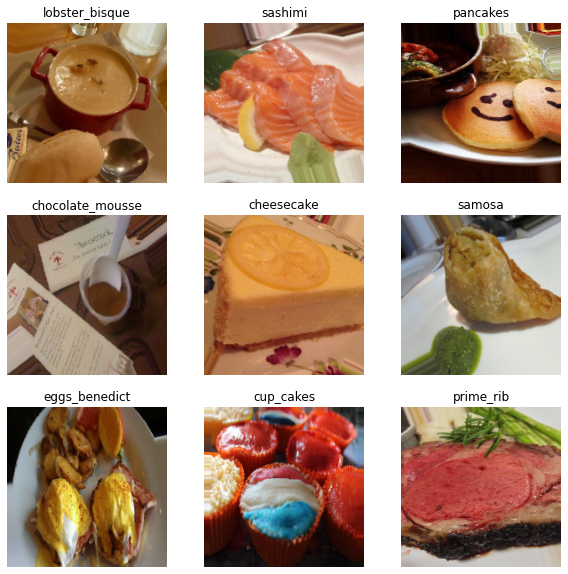

In [8]:
random_batch = train_data[random.randint(0, batch_size)]
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(random_batch[0][i])
    plt.title(class_names[random_batch[1][i].argmax()])
    plt.axis("off")

## Data augmentation visualisation

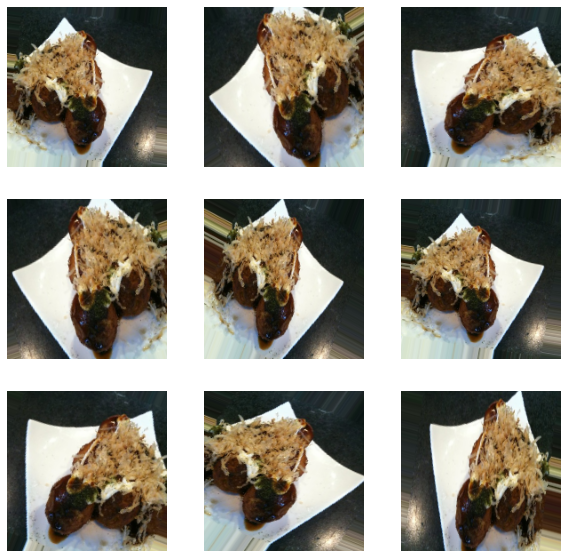

In [9]:
plt.figure(figsize=(10, 10))
for i in range(9):
    img_test = train_data[7][0][31] # img 31 of the 7th batch
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img_test)
    plt.axis("off")

## Model 
<img title="a title" alt="Alt text" src="https://miro.medium.com/max/1400/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg">

In [10]:
num_classes = len(class_names)

model = Sequential([
  layers.BatchNormalization(input_shape=(img_width, img_height, 3)),  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

2022-03-20 07:19:41.980270: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 07:19:42.080990: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 07:19:42.081699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 07:19:42.082904: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 180, 180, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [13]:
epochs=10
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
  batch_size=batch_size,
)

2022-03-20 07:19:45.609702: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-03-20 07:19:48.266614: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1263/1263 [==============================] - 1491s 1s/step - loss: 4.1340 - accuracy: 0.0777 - val_loss: 3.7568 - val_accuracy: 0.1307
Epoch 2/10
1263/1263 [==============================] - 986s 780ms/step - loss: 3.5897 - accuracy: 0.1631 - val_loss: 3.5440 - val_accuracy: 0.1769
Epoch 3/10
1263/1263 [==============================] - 1023s 810ms/step - loss: 3.2900 - accuracy: 0.2165 - val_loss: 3.2245 - val_accuracy: 0.2316
Epoch 4/10
1263/1263 [==============================] - 1007s 798ms/step - loss: 3.1020 - accuracy: 0.2537 - val_loss: 3.0760 - val_accuracy: 0.2556
Epoch 5/10
1263/1263 [==============================] - 1008s 798ms/step - loss: 2.9565 - accuracy: 0.2796 - val_loss: 2.9467 - val_accuracy: 0.2881
Epoch 6/10
1263/1263 [==============================] - 1013s 802ms/step - loss: 2.8409 - accuracy: 0.3025 - val_loss: 2.8956 - val_accuracy: 0.2997
Epoch 7/10
1263/1263 [==============================] - 1025s 811ms/step - loss: 2.7492 - accuracy: 0.3225 - val_loss: 2.

In [14]:
if running_on_kaggle:
    model.save('/kaggle/working/saved_model/')
else:
    model.save('./saved_model/')

2022-03-20 10:21:33.640196: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


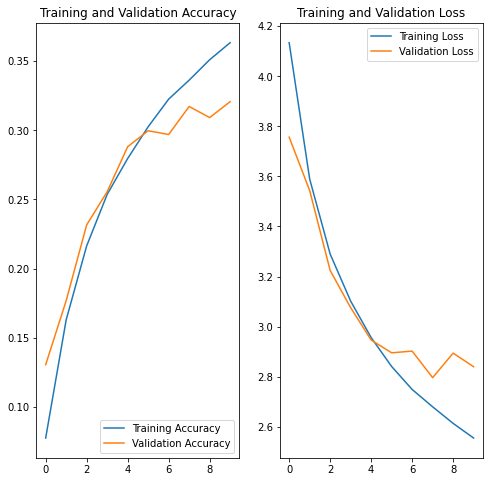

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()